In [1]:
import pandas as pd
import numpy as np
import string
from scipy.stats import pearsonr
import re
from string import punctuation


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

import re
from string import punctuation


from collections import Counter
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [2]:
sample_sadness = pd.read_excel(r"C:\Users\kushal\Desktop\bennet dataset\Task 2 data\EI-oc-En-train\EI-oc-En-sadness-train.xlsx")

In [3]:
sample_sadness.head()

,ID,Tweet,Affect Dimension,Intensity Class
0,2017-En-40023,This the most depressing shit ever,sadness,3: high amount of sadness can be inferred
1,2017-En-40983,final vestiges of my 90's childhood were just ...,sadness,0: no sadness can be inferred
2,2017-En-20751,@ManUnitedWriter He has had a dreadful first h...,sadness,1: low amount of sadness can be inferred
3,2017-En-41232,feel really sad and down todayðŸ˜’,sadness,3: high amount of sadness can be inferred
4,2017-En-40797,Wow just watched Me Before You and it was seri...,sadness,2: moderate amount of sadness can be inferred


In [4]:
sample_sadness['Intensity_class'] = sample_sadness['Intensity Class'].apply(lambda x : x.split(':')[0])
sample_sadness['Intensity_class_name'] = sample_sadness['Intensity Class'].apply(lambda x : x.split(':')[1])
sample_sadness.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name
0,2017-En-40023,This the most depressing shit ever,sadness,3: high amount of sadness can be inferred,3,high amount of sadness can be inferred
1,2017-En-40983,final vestiges of my 90's childhood were just ...,sadness,0: no sadness can be inferred,0,no sadness can be inferred
2,2017-En-20751,@ManUnitedWriter He has had a dreadful first h...,sadness,1: low amount of sadness can be inferred,1,low amount of sadness can be inferred
3,2017-En-41232,feel really sad and down todayðŸ˜’,sadness,3: high amount of sadness can be inferred,3,high amount of sadness can be inferred
4,2017-En-40797,Wow just watched Me Before You and it was seri...,sadness,2: moderate amount of sadness can be inferred,2,moderate amount of sadness can be inferred


In [5]:
sample_sadness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 6 columns):
ID                      1533 non-null object
Tweet                   1533 non-null object
Affect Dimension        1533 non-null object
Intensity Class         1533 non-null object
Intensity_class         1533 non-null object
Intensity_class_name    1533 non-null object
dtypes: object(6)
memory usage: 71.9+ KB


In [6]:
# get unique Intensity Class  counts
sample_sadness.groupby('Intensity_class_name').describe()

Affect Dimension                  \
                                                       count unique      top   
Intensity_class_name                                                           
 high amount of sadness can be inferred                  315      1  sadness   
 low amount of sadness can be inferred                   260      1  sadness   
 moderate amount of sadness can be inferred              364      1  sadness   
 no sadness can be inferred                              594      1  sadness   

                                                    ID                        \
                                            freq count unique            top   
Intensity_class_name                                                           
 high amount of sadness can be inferred      315   315    315  2017-En-40029   
 low amount of sadness can be inferred       260   260    260  2017-En-40364   
 moderate amount of sadness can be inferred  364   364    364  2017-En-41032   
 no sadness can be inferred                  594   594    594  2017-En-41338   

                                                 Intensity Class         \
                                            freq           count unique   
Intensity_class_name                                                      
 high amount of sadness can be inferred        1             315      1   
 low amount of sadness can be inferred         1             260      1   
 moderate amount of sadness can be inferred    1             364      1   
 no sadness can be inferred                    1             594      1   

                                                                                            \
                                                                                       top   
Intensity_class_name                                                                         
 high amount of sadness can be inferred          3: high amount of sadness can be inferred   
 low amount of sadness can be inferred            1: low amount of sadness can be inferred   
 moderate amount of sadness can be inferred  2: moderate amount of sadness can be inferred   
 no sadness can be inferred                                  0: no sadness can be inferred   

                                                 Intensity_class             \
                                            freq           count unique top   
Intensity_class_name                                                          
 high amount of sadness can be inferred      315             315      1   3   
 low amount of sadness can be inferred       260             260      1   1   
 moderate amount of sadness can be inferred  364             364      1   2   
 no sadness can be inferred                  594             594      1   0   

                                                 Tweet         \
                                            freq count unique   
Intensity_class_name                                            
 high amount of sadness can be inferred      315   315    315   
 low amount of sadness can be inferred       260   260    260   
 moderate amount of sadness can be inferred  364   364    364   
 no sadness can be inferred                  594   594    594   

                                                                                                \
                                                                                           top   
Intensity_class_name                                                                             
 high amount of sadness can be inferred      My soul is weary of fighting the battles in th...   
 low amount of sadness can be inferred       @gurrie_j thanks for making me super sad about...   
 moderate amount of sadness can be inferred  The Sorrow is grim reminder of how bad I can b...   
 no sadness can be inferred                  @MarGraham I am practically obsessed with it, ...   

                                        

In [7]:
sample_sadness['length'] = sample_sadness['Tweet'].apply(len)
sample_sadness.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name,length
0,2017-En-40023,This the most depressing shit ever,sadness,3: high amount of sadness can be inferred,3,high amount of sadness can be inferred,34
1,2017-En-40983,final vestiges of my 90's childhood were just ...,sadness,0: no sadness can be inferred,0,no sadness can be inferred,135
2,2017-En-20751,@ManUnitedWriter He has had a dreadful first h...,sadness,1: low amount of sadness can be inferred,1,low amount of sadness can be inferred,139
3,2017-En-41232,feel really sad and down todayðŸ˜’,sadness,3: high amount of sadness can be inferred,3,high amount of sadness can be inferred,34
4,2017-En-40797,Wow just watched Me Before You and it was seri...,sadness,2: moderate amount of sadness can be inferred,2,moderate amount of sadness can be inferred,96


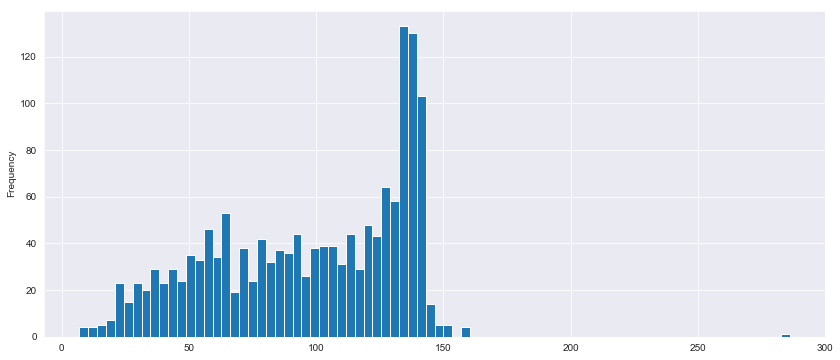

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,6))
sample_sadness['length'].plot(bins=80, kind='hist') 

In [10]:
# get most common words in training dataset
all_words = []
for line in list(sample_sadness['Tweet']):
    words = line.split()
    
for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

[('worst', 2),
 ('idk', 1),
 ('why', 1),
 ('people', 1),
 ('be', 1),
 ('glorifying', 1),
 ('depression.', 1),
 ('i', 1),
 ("wouldn't", 1),
 ('wish', 1)]

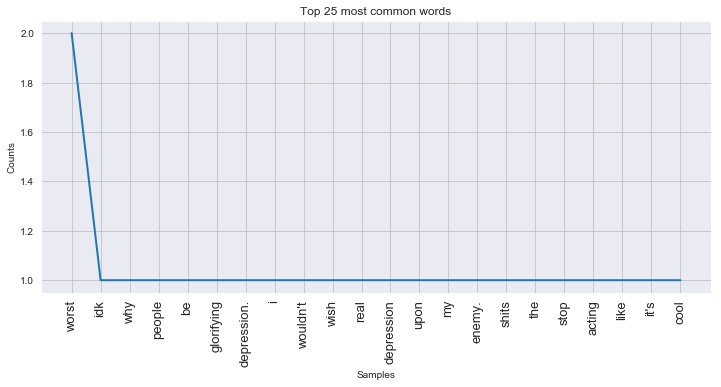

Text(0.5, 1.0, 'log-log plot of words frequency')

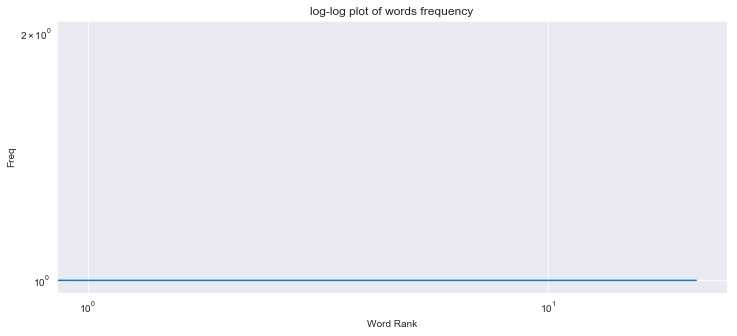

In [11]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [12]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove chines words
    tweet = re.sub(r'˜¥\w*','', tweet)
    tweet = re.sub(r'˜€\w*','', tweet)
    tweet = re.sub(r'˜¤\w*','', tweet)
    tweet = re.sub(r'˜ªðÿ\w*','', tweet)
    tweet = re.sub(r'ðÿ™\w*','', tweet)
    tweet = re.sub(r'\\\w*','', tweet)
    tweet = re.sub(r'±\w*','', tweet)
    tweet = re.sub(r'\w*','', tweet)
    tweet = re.sub(r'™„˜­\w*','', tweet)
    tweet = re.sub(r'ðÿ§€\w*','', tweet)
    tweet = re.sub(r'‘šðÿ¼\w*','', tweet)
    tweet = re.sub(r'ðÿ•\w*','', tweet)
    tweet = re.sub(r'€¢\w*','', tweet)
    tweet = re.sub(r'ã©\w*','', tweet)
    
    tweet = re.sub(r'\w*','',tweet)
    
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet
# ______________________________________________________________

# clean dataframe's text column
sample_sadness['Tweet'] = sample_sadness['Tweet'].apply(processTweet)
# preview some cleaned tweets
sample_sadness['Tweet'].head(1000)

0                     this the most depressing shit ever
1      final vestiges childhood were just dashed the ...
2      has had dreadful first half not mention rashfo...
3                     feel really sad and down todayðÿ˜’
4      wow just watched before you and was seriously ...
5        way too cool die young way too young die sober 
6        happy birthday roy buchanan born this day 1939 
7                   ibiza blues hitting hard already wow
8                    awareness time awareness time lost 
9      episode today whilst editing there was power o...
10                              great programme tonight 
11              most days don know what heart beats for 
12     bare videos online but does anyone get rehabil...
13     you can tell the camp isn happy purely through...
14               bill clinton not grow weary doing good 
15                                     too dull for the 
16                                                  life
17     haven watched favorite y

In [13]:
# drop duplicates
sample_sadness= sample_sadness.drop_duplicates('Tweet')
sample_sadness.shape

(1436, 7)

In [14]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [15]:
# show stop words examples
stop_words = stopwords.words('english') # Show some stop words
' , '.join(stop_words)[:200], len(stop_words)

("i , me , my , myself , we , our , ours , ourselves , you , you're , you've , you'll , you'd , your , yours , yourself , yourselves , he , him , his , himself , she , she's , her , hers , herself , it ",
 179)

In [16]:
sample_sadness["Tweet"].head(10)

0                   this the most depressing shit ever
1    final vestiges childhood were just dashed the ...
2    has had dreadful first half not mention rashfo...
3                   feel really sad and down todayðÿ˜’
4    wow just watched before you and was seriously ...
5      way too cool die young way too young die sober 
6      happy birthday roy buchanan born this day 1939 
7                 ibiza blues hitting hard already wow
8                  awareness time awareness time lost 
9    episode today whilst editing there was power o...
Name: Tweet, dtype: object

In [17]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]




# -------------------------------------------

# tokenize message column and create a column for tokens
sample_sadness = sample_sadness.copy()
sample_sadness['tokens'] = sample_sadness['Tweet'].apply(text_process) # tokenize style


sample_sadness.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name,length,tokens
0,2017-En-40023,this the most depressing shit ever,sadness,3: high amount of sadness can be inferred,3,high amount of sadness can be inferred,34,"[depressing, shit, ever]"
1,2017-En-40983,final vestiges childhood were just dashed the ...,sadness,0: no sadness can be inferred,0,no sadness can be inferred,135,"[final, vestiges, childhood, dashed, shoals, h..."
2,2017-En-20751,has had dreadful first half not mention rashfo...,sadness,1: low amount of sadness can be inferred,1,low amount of sadness can be inferred,139,"[dreadful, first, half, mention, rashford, wou..."
3,2017-En-41232,feel really sad and down todayðÿ˜’,sadness,3: high amount of sadness can be inferred,3,high amount of sadness can be inferred,34,"[feel, really, sad, todayðÿ˜’]"
4,2017-En-40797,wow just watched before you and was seriously ...,sadness,2: moderate amount of sadness can be inferred,2,moderate amount of sadness can be inferred,96,"[wow, watched, seriously, one, depressing, mov..."


In [18]:
from wordcloud import WordCloud

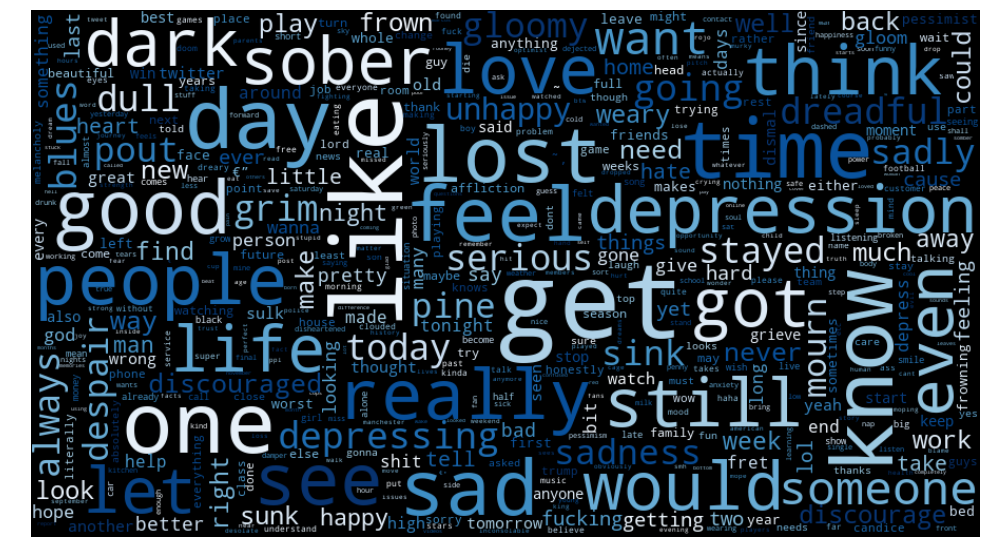

In [20]:
# split sentences to get individual words
all_words = []
for line in sample_sadness['tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
# vectorize
bow_transformer = CountVectorizer(analyzer=text_process).fit(sample_sadness['Tweet'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
# output
6865
# example of vectorized text
sample_tweet = sample_sadness['Tweet'][111]
print(sample_tweet)
print('\n')
# vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
print('\n')



4231
childhood experiences inform adult relationships have associative memories not question ability process 


  (0, 57)	1
  (0, 92)	1
  (0, 240)	1
  (0, 618)	1
  (0, 1237)	1
  (0, 1831)	1
  (0, 2267)	1
  (0, 2816)	1
  (0, 2867)	1
  (0, 2960)	1




In [22]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(sample_sadness['Tweet'])
# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)


Shape of Sparse Matrix:  (1436, 4231)
Amount of Non-Zero occurences:  10702


In [23]:
# from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)


  (0, 2960)	0.31537438575186794
  (0, 2867)	0.30272361266688186
  (0, 2816)	0.3332046489755713
  (0, 2267)	0.29291091071783293
  (0, 1831)	0.3332046489755713
  (0, 1237)	0.31537438575186794
  (0, 618)	0.31537438575186794
  (0, 240)	0.3332046489755713
  (0, 92)	0.31537438575186794
  (0, 57)	0.30272361266688186


In [24]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)



(1436, 4231)


In [25]:
# Run Train Data Through Pipeline analyzer=text_process
# uncomment below to train on a larger dataset but it is very slow for a regular laptop

# X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(sample_sadness['Tweet'], sample_sadness['Intensity_class'], test_size=0.3, random_state = 42)


# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }

# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)

# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Model: 0.387065 using {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.370149 Stdev:(0.033597) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.385075 Stdev:(0.031787) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.365174 Stdev:(0.033657) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.375124 Stdev:(0.034081) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.382090 Stdev:(0.026901) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.387065 Stdev:(0.031134) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.375124 Stdev:(0.026605) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.380100 Stdev:(0.032390) with: {'bow__ngram_range'

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.8s finished
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
from sklearn.externals import joblib

In [27]:
# save best model to current working directory
joblib.dump(grid, "twitter_sentiment.pkl")

['twitter_sentiment.pkl']

In [28]:
# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("twitter_sentiment.pkl" )

# get predictions from best model above
y_preds = model_NB.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.42691415313225056


confusion matrix: 
 [[105  24  33  12]
 [ 31  18  17   3]
 [ 37  17  27  20]
 [ 26   6  21  34]]


              precision    recall  f1-score   support

           0       0.53      0.60      0.56       174
           1       0.28      0.26      0.27        69
           2       0.28      0.27      0.27       101
           3       0.49      0.39      0.44        87

   micro avg       0.43      0.43      0.43       431
   macro avg       0.39      0.38      0.38       431
weighted avg       0.42      0.43      0.42       431

